In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
# Permet d'afficher les figures directement dans le notebook:
%matplotlib inline

In [5]:
analyse_2 = pd.read_csv("analyse_2.csv")
months=analyse_2["MONTHS_SINCE_LAST"].values
donation=analyse_2["NUMBER_OF_DONATION"].values
march=analyse_2["MARCH_2007"].values

In [21]:
tabX=[]
tabY=[]
label=[]

for i in months:
    tabX.append(i)

for i in donation:
    tabY.append(i)

for i in march:
    if (i==0):
        label.append(-1)
    else:
        label.append(i)

In [45]:
class LabeledSet:  
    def __init__(self, input_dimension):
        self.input_dimension = input_dimension
        self.nb_examples = 0
    
    def addExample(self,vector,label):
        if (self.nb_examples == 0):
            self.x = np.array([vector])
            self.y = np.array([label])
        else:
            self.x = np.vstack((self.x, vector))
            self.y = np.vstack((self.y, label))
        
        self.nb_examples = self.nb_examples + 1
    
    #Renvoie la dimension de l'espace d'entrée
    def getInputDimension(self):
        return self.input_dimension
    
    #Renvoie le nombre d'exemples dans le set
    def size(self):
        return self.nb_examples
    
    #Renvoie la valeur de x_i
    def getX(self, i):
        return self.x[i]
        
    #Renvouie la valeur de y_i
    def getY(self, i):
        return(self.y[i])

def plot2DSet(dataset):
    cpt=0
    while (cpt<dataset.size()):
        point=dataset.getX(cpt)
        label=dataset.getY(cpt)
        if (label==-1):
            plt.scatter(point[0],point[1], marker='o', color='purple')
        if (label==1):
            plt.scatter(point[0],point[1], marker='o', color='yellow')
        cpt+=1
    
class Classifier:
    def __init__(self, input_dimension):
        raise NotImplementedError("Please Implement this method")
    
    #Permet de calculer la prediction sur x => renvoie un score
    def predict(self, x):
        raise NotImplementedError("Please Implement this method")
    
    #Permet d'entrainer le modele sur un ensemble de données
    def train(self, labeledSet):
        raise NotImplementedError("Please Implement this method")
    
    #Permet de calculer la qualité du système 
    def accuracy (self,dataset):
        taille=dataset.size()
        i=0
        win=0
        for i in range (taille):
            predict=self.predict(dataset.getX(i))
            #print(dataset.getY(i))
            #print(np.sign(predict))
            if (np.sign(predict) == np.sign(dataset.getY(i))):
                win=win+1
            #print (taille)
        return win/float(taille)
    
def plot_frontiere(set, classifier, step=20):
    mmax = set.x.max(0)
    mmin = set.x.min(0)
    x1grid, x2grid = np.meshgrid(np.linspace(mmin[0], mmax[0], step), np.linspace(mmin[1], mmax[1], step))
    grid = np.hstack((x1grid.reshape(x1grid.size, 1), x2grid.reshape(x2grid.size, 1)))
    
    # calcul de la prediction pour chaque point de la grille
    res = np.array([classifier.predict(grid[i,:]) for i in range(len(grid)) ])
    res = res.reshape(x1grid.shape)
    # tracé des frontieres
    plt.contourf(x1grid, x2grid, res, colors=["red", "cyan"], levels=[-1000,0,1000], linewidth=2)

class KNN(Classifier):
    def __init__(self, input_dimension,n):
        self.input_dimension=input_dimension
        self.n=n
        
    def distance(self,a,b):
        sommeCarre = 0
        for i in range(len(a)) :
            sommeCarre += (a[i] - b[i])**2
            
        d = sqrt(sommeCarre)
        return d
    
    def train(self,dataset):
        self.data=dataset
    
    #Permet de calculer la prediction sur x => renvoie un score
    def predict(self, x):
        distance=[]
        taille=self.data.size()
        i=0
        while (i<taille):
            point=self.data.getX(i)
            #if ((point[0]==x[0]) and (point[1]==x[1])):
            #    i=i+1
            distance.append(self.distance(x,point))
            i=i+1
        #print(distance)
        #tableau des indices des valeurs par ordre croissant
        distance_arg=np.argsort(distance)
        #print(distance_arg)
        i=0
        label1=0
        label2=0
        #print("-------------")
        while (i<self.n):
            #print(distance_arg[i])
            if (self.data.getY(distance_arg[i])==1):
                label1=label1+1
            if (self.data.getY(distance_arg[i])==-1):
                label2=label2+1
            i=i+1
        #si il y a plus de 1
        if (label1>=label2):
            res=1
            return res
        #si il y a plus de -1
        if (label2>label1):
            res=-1
            return res

In [41]:
def normalize (table):
    acc=0
    tab2=[]
    for i in table :
        acc+=i
    for i in table:
        tab2.append(i/acc)
    return tab2
        
tabXn=normalize(tabX)
tabYn=normalize(tabY)
labeln=normalize(label)

In [42]:
apprentissage = LabeledSet(2)
cpt=0
for i in tabX :
    apprentissage.addExample([i,tabY[cpt]],label[cpt])
    cpt+=1

C:\Users\Fabien\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


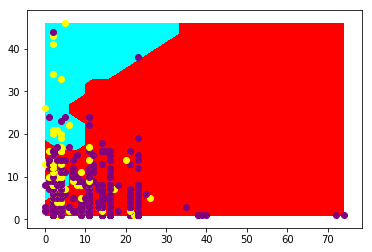

In [48]:
knn=KNN(2,8)
knn.train(apprentissage)
plot_frontiere(apprentissage,knn,20)
plot2DSet(apprentissage)